<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:250%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 20px; padding-top: 20px; padding-bottom: 20px;"><b><b><span style='color:#2ae4f5''></span></b> Exercise no. 4  </b></p>
</div>

# Groupby and Introduction to Boxplot

1. [Quick recap](#1)
2. [Groupby: titanic_df questions](#2)
3. [DateTime.](#3)


#  <b id="Top"> </b>  

<a id='1'></a>

<a class="anchor" id='1'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">Quick recap.</h1>

---

>
>* `groupby()` - group according to the columns specified
>
>* `reset_index()`  adds a numerical index
>
>* `pd.to_datetime(df['date'])` - changes the attribute type to datetime
>
>* `pd.DatetimeIndex(df['date']).month` - extracts the month from the datatime attribute
>
>* `apply` - applies a function on each row (axis =0) in the dataframe. Change to (axis = 1) to apply the function on each column [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)
>
>* `lambda` - small anonymous function
>
>* `agg` - apply multiple functions at once, one for each specified column [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
>
>* `unstack` - unstack the inner-most index onto a column [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)
>
>* `droplevel(0, axis = 1)` - drops the highest (first) level in the column index of a multi-index dataframe
>
>* `transpose` - switch between columns and rows
---

<a id='2'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">Groupby: titanic_df</h1>

In [1]:
import pandas as pd

In [2]:
import os
os.getcwd()

'C:\\Users\\razel\\Desktop\\אריאל\\data-analytics\\\u200f\u200fMy Lectures\\tigul4'

In [3]:
url = 'https://raw.githubusercontent.com/Razelbaz1/exercises-package/master/data/titanic.csv'
titanic_df = pd.read_csv(url,encoding='latin1')

In [4]:
titanic_df.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


# Now you.

#### 1.1 What is the average age for male versus female Titanic passengers?

In [5]:
titanic_df.columns

Index(['row.names', 'pclass', 'survived', 'name', 'age', 'embarked',
       'home.dest', 'room', 'ticket', 'boat', 'sex'],
      dtype='object')

##### Asn

In [6]:
titanic_df.groupby(["sex"])['age'].mean()

sex
female    30.572702
male      31.581410
Name: age, dtype: float64

> Or alternatively: if we want to save the output as a `DataFrame`.

In [7]:
titanic_df[["sex", "age"]].groupby("sex").mean()

,age
sex,
female,30.572702
male,31.581410


#### 1.2 How many passengers were in each class ?

##### Asn

In [8]:
titanic_df.groupby('pclass')['row.names'].count()

pclass
1st    322
2nd    280
3rd    711
Name: row.names, dtype: int64

In [9]:
titanic_df.groupby('pclass')['pclass'].count()

pclass
1st    322
2nd    280
3rd    711
Name: pclass, dtype: int64

In [10]:
titanic_df.groupby("pclass")["pclass"].count().reset_index(name='counts')

,pclass,counts
0,1st,322
1,2nd,280
2,3rd,711


**OR**

In [11]:
titanic_df.groupby(['pclass']).size()

pclass
1st    322
2nd    280
3rd    711
dtype: int64

> Basically, a `size` function counts the number of rows in each group.

In [12]:
#titanic_df.groupby("pclass").count()  

In [13]:
# Whats the problem here ?

#### 1.3 Answer the question so that the output is as a data frame. 

##### Asn

In [14]:
# As dataframe
titanic_df.groupby(['pclass']).size().reset_index(name='counts')

,pclass,counts
0,1st,322
1,2nd,280
2,3rd,711


**OR**

In [15]:
titanic_df.groupby(['pclass'])["pclass"].count().reset_index(name='counts')

,pclass,counts
0,1st,322
1,2nd,280
2,3rd,711


#### 2. Suggest a solution for the code you wrote to additionally classify by gender.

##### Asn

In [16]:
titanic_df.groupby(['pclass'])['sex'].value_counts()

pclass  sex   
1st     male      179
        female    143
2nd     male      173
        female    107
3rd     male      498
        female    213
Name: count, dtype: int64

In [17]:
titanic_df.groupby(['pclass','sex'])['sex'].count()

pclass  sex   
1st     female    143
        male      179
2nd     female    107
        male      173
3rd     female    213
        male      498
Name: sex, dtype: int64

#### 3.1 Suggest a solution for how many survived by class and gender.

##### Asn

In [18]:
titanic_df.groupby(['pclass','sex'])['survived'].sum()

pclass  sex   
1st     female    134
        male       59
2nd     female     94
        male       25
3rd     female     79
        male       58
Name: survived, dtype: int64

#### 3.2 Suggest a solution for how many survived AND not survived by class and gender.

##### Asn

In [19]:
titanic_df.groupby(['pclass','sex'])['survived'].value_counts()

pclass  sex     survived
1st     female  1           134
                0             9
        male    0           120
                1            59
2nd     female  1            94
                0            13
        male    0           148
                1            25
3rd     female  0           134
                1            79
        male    0           440
                1            58
Name: count, dtype: int64

#### 4. Suggest a solution for how many total and average survivors by class

##### Asn

In [20]:
titanic_df.groupby(['pclass'])['survived'].agg(['mean','sum'])

,mean,sum
pclass,,
1st,0.599379,193
2nd,0.425000,119
3rd,0.192686,137


#### Can we convert continuous or interval ratio types of data into a categorical variable ?
#### Think about a way to group by `age`


---
#### A common way to look at the distribution of a continuous number is through a graph called a `histogram`. [Read here for more](#https://seaborn.pydata.org/generated/seaborn.histplot.html)
A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

We will talk about this in detail during the semester.

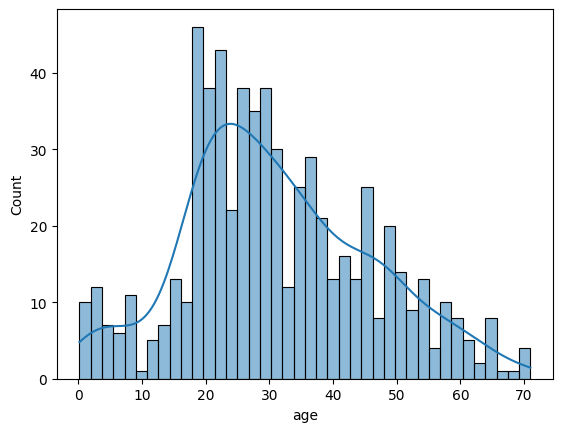

In [6]:
import seaborn as sns
sns.histplot(titanic_df['age'],bins = 40 ,kde= True);

#### Can we convert continuous or interval ratio types of data into a categorical variable ?
#### Think about a way to group by `age`


##### Hint: look for `pd.cut` via internet

"
    Bin values into discrete intervals.

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.
        "

### So how do we divide them?
##### By equal ranges in numbers **or** by the amount of values?

In [7]:
titanic_df[['age']].describe().round()

,age
count,633.0
mean,31.0
std,15.0
min,0.0
25%,21.0
50%,30.0
75%,41.0
max,71.0


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''> |</span></b> Division by fixed numerical ranges - pd.cut</b></p>
</div>

In [8]:
titanic_df['age_bins'] = pd.cut(titanic_df['age'], bins = 3, labels = ('young', 'middle_age', 'old' )) # bins also accept intervals such as bins=range(0, 100, 10)

In [9]:
bins = pd.cut(titanic_df['age'], bins=3) #show intervals
print(bins.cat.categories)  

IntervalIndex([(0.0959, 23.778], (23.778, 47.389], (47.389, 71.0]], dtype='interval[float64, right]')


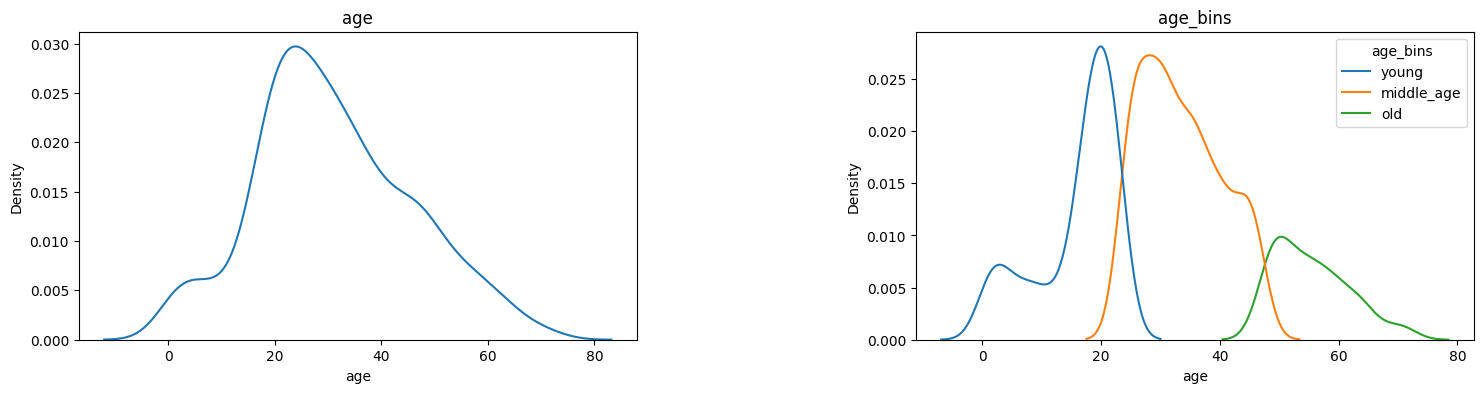

In [10]:
import matplotlib.pyplot as plt  #for reshaping graph size

fig, ax = plt.subplots(1,2, figsize = (18,4))
plt.subplots_adjust(wspace = 0.5)

sns.kdeplot(data = titanic_df,x='age', ax = ax[0]);
ax[0].set_title('age');

sns.kdeplot(data = titanic_df,x='age',hue= 'age_bins', ax = ax[1] );
ax[1].set_title('age_bins');


**KDE, or Kernl Density Estimation, is a statistical tool that aims to estimate the density function of a random variable (distribution) based on given data.** (More on the graph later in the semester.)

#### How many have survived now by age group?

##### Asn

In [26]:
titanic_df.groupby(['age_bins'], observed=False)['survived'].sum()

# what happen if :
# titanic_df.groupby(['age_bins']).sum()

# every numeric column will appear

age_bins
young         104
middle_age    130
old            47
Name: survived, dtype: int64

**Add `observed=False` to include the categories that did not receive values** 

Suppose the `age_bins` category contains the following ranges: ['young', 'middle_age', 'old'], but the data only contains values for the ranges `young` and `old`.

`observed=False`: The output will also include the `middle_age` category with a value of `0`, because it is part of the defined categories.

`observed=True`: The output will only include `young` and `old`, without categories that have no data.

##### Have we classified the ages correctly?
##### Suggest a way to check this.

In [11]:
age_group_stats = titanic_df.groupby('age_bins', observed=False)['age'].describe()
age_group_stats

,count,mean,std,min,25%,50%,75%,max
age_bins,,,,,,,,
young,209.0,15.946969,6.836041,0.1667,13.0,18.0,21.0,23.0
middle_age,325.0,33.596923,6.797829,24.0000,28.0,32.0,39.0,47.0
old,99.0,55.494949,6.255404,48.0000,50.0,54.0,60.0,71.0


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''> |</span></b> Division by an equal number of values - pd.qcut</b></p>
</div>

In [12]:
bins = pd.qcut(titanic_df['age'], q=3)
print(bins.cat.categories)

IntervalIndex([(0.166, 24.0], (24.0, 36.0], (36.0, 71.0]], dtype='interval[float64, right]')


In [13]:
titanic_df['age_bins_qcut'] = pd.qcut(titanic_df['age'], q=3, labels=['young', 'middle_age', 'old'])

Text(0.5, 1.0, 'age_bins')

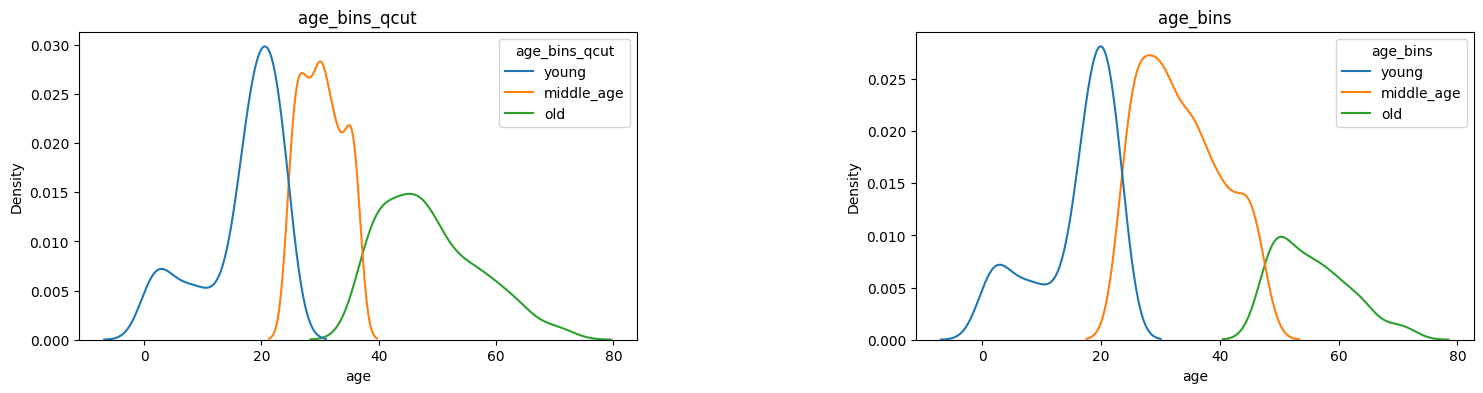

In [14]:
import matplotlib.pyplot as plt  #for reshaping graph size

fig, ax = plt.subplots(1,2, figsize = (18,4))
plt.subplots_adjust(wspace = 0.5)

sns.kdeplot(data = titanic_df,x='age',hue= 'age_bins_qcut', ax = ax[0] );
ax[0].set_title('age_bins_qcut');

sns.kdeplot(data = titanic_df,x='age',hue= 'age_bins', ax = ax[1]);
ax[1].set_title('age_bins')




### And now :

In [15]:
titanic_df.groupby(['age_bins_qcut'], observed=False)['survived'].sum()

age_bins_qcut
young         114
middle_age     82
old            85
Name: survived, dtype: int64

> Instead of the predefined statistics, specific combinations of aggregating statistics for given columns can be defined using the `DataFrame.agg()` method:

In [16]:
titanic_df.agg({"age": ["count","min", "max", "median", "skew"]})

,age
count,633.000000
min,0.166700
max,71.000000
median,30.000000
skew,0.302984


### `pd.cut` vs `pd.qcut`

In [17]:
age_group_stats2 = titanic_df.groupby(['age_bins_qcut'], observed=False)['age'].describe()
age_group_stats3 = titanic_df.groupby(['age_bins','age_bins_qcut'], observed=False)['age'].describe()
age_group_stats3

count       mean       std      min   25%   50%  \
age_bins   age_bins_qcut                                                    
young      young          209.0  15.946969  6.836041   0.1667  13.0  18.0   
middle_age young           22.0  24.000000  0.000000  24.0000  24.0  24.0   
           middle_age     201.0  30.348259  3.550790  25.0000  27.0  30.0   
           old            102.0  42.068627  3.118961  37.0000  39.0  42.0   
old        old             99.0  55.494949  6.255404  48.0000  50.0  54.0   

                           75%   max  
age_bins   age_bins_qcut              
young      young          21.0  23.0  
middle_age young          24.0  24.0  
           middle_age     33.0  36.0  
           old            45.0  47.0  
old        old            60.0  71.0

### **1. `pd.cut` - Division into Fixed Numerical Ranges**

#### When to Use:

- Use when you want to divide data into **fixed numerical ranges**, not by the number of values.
- Suitable for data with a **relatively uniform distribution**, meaning there isn’t a high concentration of values in specific ranges.
- Ideal for analyzing specific numerical ranges, such as:
  - Age ranges (e.g., 0-20, 20-40, 40-60).
  - Known financial intervals.

#### Example for Using `pd.cut`:

Suppose you have Titanic passengers' ages (ranging from 0 to 80), and most passengers are evenly spread across this range. If you divide the ages into 3 bins, the division would look like this:

- **Bin 1 (0-27):** Young passengers.
- **Bin 2 (27-53):** Middle-aged passengers.
- **Bin 3 (53-80):** Older passengers.

**Advantage**: Easy to interpret the meaning of each range in numerical terms.  
**Disadvantage**: If most passengers are young (e.g., 80% are between 0-27), this range will be "overcrowded," making it hard to analyze the entire population fairly.

---

### **2. `pd.qcut` - Division into Equal-Sized Groups**

#### When to Use:

- Use when you want to divide the data into bins with an **equal number of values**.
- Suitable for data with a **non-uniform distribution**, where values are concentrated in specific ranges.
- Ideal for creating balanced groups that represent **quantiles** (e.g., terciles or quartiles).


#### Example for Using `pd.qcut`:

Using the same Titanic age data, suppose 80% of passengers are aged 0-27, and only 20% are aged 27-80. If you use `pd.qcut` to divide the data into 3 bins, the division would look like this:

- **Bin 1 (0-15):** The first tercile of passengers (very young).
- **Bin 2 (15-30):** The second tercile (slightly older).
- **Bin 3 (30-80):** The last tercile (older passengers).

**Advantage**: Each bin contains an equal number of passengers, even if the distribution is uneven.  
**Disadvantage**: The numerical ranges may be harder to interpret intuitively (e.g., uneven ranges like 0-15, 15-30).

---

### **Comparison Between the Two Methods**

| **Feature**                    | **`pd.cut`**                              | **`pd.qcut`**                             |
|--------------------------------|-------------------------------------------|-------------------------------------------|
| **Division by ranges**         | Divides into equal numerical ranges.       | Divides into ranges with equal number of values. |
| **Number of values per range** | May vary across ranges.                    | Almost equal in every category.           |
| **Use case**                   | Analysis based on fixed numerical ranges.  | Analysis based on equal-sized groups.     |
| **Suitable for data distribution** | Uniform or near-uniform distribution.      | Non-uniform distribution or with dense clusters. |

### [▲](#Top)

---


<a id='3'></a>
<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">DateTime.</h1>

#### We will focus on date column

In [19]:
url = 'https://raw.githubusercontent.com/Razelbaz1/exercises-package/refs/heads/master/data/earthquake_data.csv'
df = pd.read_csv(url)

In [22]:
df["date_time"]

0      22/11/2022 02:03
1      18/11/2022 13:37
2      12/11/2022 07:09
3      11/11/2022 10:48
4      09/11/2022 10:14
             ...       
777    13/01/2001 17:33
778    10/01/2001 16:02
779    09/01/2001 16:49
780    01/01/2001 08:54
781    01/01/2001 06:57
Name: date_time, Length: 782, dtype: object

#### note that date type is object. let's convert it to pandas datetime


In [23]:
df["date_time"] = pd.to_datetime(df.date_time)
df["date_time"]

C:\Users\razel\AppData\Local\Temp\ipykernel_16720\3687597699.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["date_time"] = pd.to_datetime(df.date_time)


0     2022-11-22 02:03:00
1     2022-11-18 13:37:00
2     2022-11-12 07:09:00
3     2022-11-11 10:48:00
4     2022-11-09 10:14:00
              ...        
777   2001-01-13 17:33:00
778   2001-01-10 16:02:00
779   2001-01-09 16:49:00
780   2001-01-01 08:54:00
781   2001-01-01 06:57:00
Name: date_time, Length: 782, dtype: datetime64[ns]

In [24]:
df["date_time"] = pd.to_datetime(df.date_time, dayfirst= True) #  format = '%d/%m/%Y %H:%M'
df["date_time"]

0     2022-11-22 02:03:00
1     2022-11-18 13:37:00
2     2022-11-12 07:09:00
3     2022-11-11 10:48:00
4     2022-11-09 10:14:00
              ...        
777   2001-01-13 17:33:00
778   2001-01-10 16:02:00
779   2001-01-09 16:49:00
780   2001-01-01 08:54:00
781   2001-01-01 06:57:00
Name: date_time, Length: 782, dtype: datetime64[ns]

#### now we can extract the year,month,day and weekday properties (and much more )

In [26]:
dfDateTimeObj = pd.DatetimeIndex(df.date_time)
df['year'] = dfDateTimeObj.year
df['month'] = dfDateTimeObj.month
df['day'] = dfDateTimeObj.day
df['weekday'] = dfDateTimeObj.weekday

df[['year','month','day','weekday']]


,year,month,day,weekday
0,2022,11,22,1
1,2022,11,18,4
2,2022,11,12,5
3,2022,11,11,4
4,2022,11,9,2
...,...,...,...,...
777,2001,1,13,5
778,2001,1,10,2
779,2001,1,9,1
780,2001,1,1,0


In [27]:
seasons = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'}
df['Season'] = df['month'].apply(lambda x: seasons[x])

In [57]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country', 'year', 'month', 'day',
       'weekday', 'Season'],
      dtype='object')

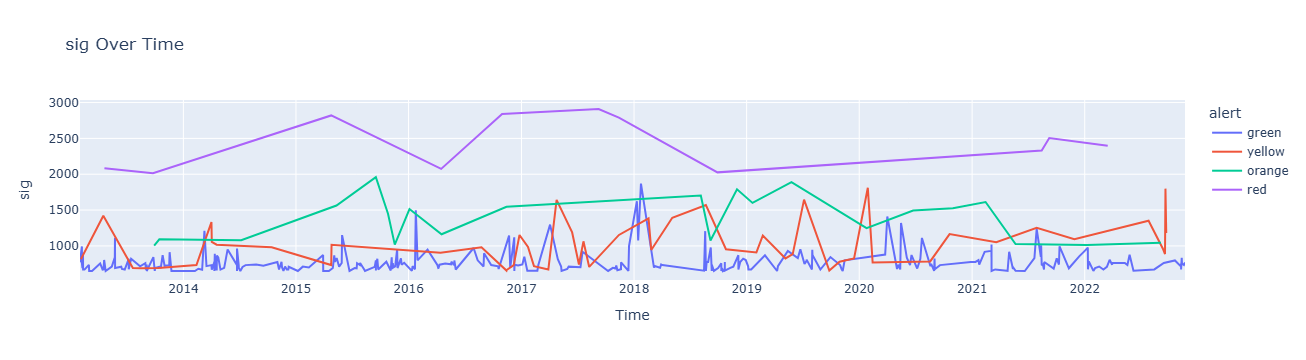

In [67]:
import plotly.express as px
import numpy as np
# Sort DataFrame by 'trending_date'

df.sort_values(by='year')
# Plot directly
fig = px.line(df[df['year'] > 2012], x='date_time', y='sig', color='alert',
              title='sig Over Time',
              labels={'date_time': 'Time'})

fig.show()